In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install keras
!pip install tensorflow

In [3]:
!pip install numpy
!pip install matplotlib
!pip install pandas

In [4]:
# import keras library
import keras
#import ImageDataGenerator from keras.preprocessing.image
from keras.preprocessing.image import ImageDataGenerator 

In [5]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [6]:
#Import the Model Building Libraries
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [7]:
#Preprocessing the training image dataset _data_augmentation
train_datagen = ImageDataGenerator(
                                   rotation_range=180,
                                   brightness_range=None,
                                   shear_range=0.4,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rescale=1./255,)

In [8]:
# Preprocessing the Testing Dataset Images _data_augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__ (self): return 0

In [10]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='c54TjAL2Fk4lME_t5N7QcuCdFS5ZEsRYBTbvEJIKibqu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'forestfireimageclassification-donotdelete-pr-yuifovm4ejm0le'
object_key = 'Dataset.zip'

streaming_body_10 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [11]:
!pip install -U ibm-watson-machine-learning

In [12]:
import io
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_10.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [13]:
pwd

'/home/wsuser/work'

In [14]:
import os
filenames= os.listdir ('/home/wsuser/work/Dataset')

In [15]:
xtrain = train_datagen.flow_from_directory('/home/wsuser/work/Dataset/train_set',
                                           target_size=(64,64),
                                           class_mode='binary',
                                           batch_size=100)

Found 436 images belonging to 2 classes.


In [16]:
xtest = train_datagen.flow_from_directory('/home/wsuser/work/Dataset/test_set',
                                           target_size=(64,64),
                                           class_mode='binary',
                                           batch_size=100)

Found 121 images belonging to 2 classes.


In [17]:
xtrain.class_indices

{'forest': 0, 'with fire': 1}

In [18]:
#Initialize the Model
model = Sequential()

In [19]:
#Convolution Layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [20]:
#MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

In [21]:
#Flatten Layer
model.add(Flatten())

In [22]:
#Adding the Dense Layer
#Hidden Layer
model.add(Dense(350,activation='relu')) # Hidden layer 1
model.add(Dense(200,activation='relu')) # Hidden layer 2
model.add(Dense(2, activation='relu')) # Hidden layer 3

In [23]:
#Output Layer
model.add(Dense(1,activation='softmax'))

In [24]:
#Configuring the Learning Prcoess
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
#Training the Model
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

Epoch 1/10
5/5 [==============================] - 20s 4s/step - loss: 0.6933 - accuracy: 0.3555 - val_loss: 0.6927 - val_accuracy: 0.4050
Epoch 2/10
5/5 [==============================] - 16s 3s/step - loss: 0.6922 - accuracy: 0.3555 - val_loss: 0.6923 - val_accuracy: 0.4050
Epoch 3/10
5/5 [==============================] - 16s 3s/step - loss: 0.6915 - accuracy: 0.3555 - val_loss: 0.6918 - val_accuracy: 0.4050
Epoch 4/10
5/5 [==============================] - 16s 3s/step - loss: 0.6909 - accuracy: 0.3555 - val_loss: 0.6914 - val_accuracy: 0.4050
Epoch 5/10
5/5 [==============================] - 16s 3s/step - loss: 0.6902 - accuracy: 0.3555 - val_loss: 0.6909 - val_accuracy: 0.4050
Epoch 6/10
5/5 [==============================] - 16s 4s/step - loss: 0.6895 - accuracy: 0.3555 - val_loss: 0.6905 - val_accuracy: 0.4050
Epoch 7/10
5/5 [==============================] - 16s 3s/step - loss: 0.6889 - accuracy: 0.3555 - val_loss: 0.6901 - val_accuracy: 0.4050
Epoch 8/10
5/5 [==================

In [26]:
#Save the Model
model.save('Forest_fire.h5')

In [27]:
!tar -zcvf image-classification-model_new.tgz Forest_fire.h5

Forest_fire.h5


In [28]:
ls -1

Dataset/
Forest_fire.h5
image-classification-model_new.tgz
my_model2.tar.gz


In [29]:
!pip install watson-machine-learning-client --upgrade

In [30]:
 from ibm_watson_machine_learning import APIClient

In [31]:
wml_credentials={
                "url": "https://us-south.ml.cloud.ibm.com",
                "apikey": "7BdOMEdkKtNJ6spAgONr8NeM9TQG965MavZlAwFJ3Z5S"
                }

In [32]:
client= APIClient(wml_credentials)

In [33]:
def guid_from_space_name(client, space_name ):
    space = client.spaces.get_details()
    #print (space)
    return (next(item for item in space ['resources'] if item ['entity']['name']== space_name)['metadata']['id'])

In [34]:
space_uid = guid_from_space_name(client, 'Forest_fire_model')
print ('Space ID = ' + space_uid)

Space ID = 591e1daf-f677-4b5f-9dba-5dba20311381


In [35]:
client.set.default_space(space_uid)

'SUCCESS'

In [36]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [37]:
software_spec_uid = client.software_specifications.get_uid_by_name ('tensorflow_rt22.1-py3.9')
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [38]:
model_details= client.repository.store_model (model= 'image-classification-model_new.tgz'
,meta_props={
client.repository.ModelMetaNames.NAME:'CNN',
client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}
                                             )
model_id= client.repository.get_model_id (model_details)

In [39]:
model_id

'3dae6756-d295-4131-b79b-9b22fcc661b8'

In [41]:
client.repository.download (model_id, 'my_model4.tar.gz')

Successfully saved model content to file: 'my_model4.tar.gz'


'/home/wsuser/work/my_model4.tar.gz'

In [42]:
from keras.models import load_model
from keras.preprocessing import image

In [43]:
model= load_model('Forest_fire.h5')

In [44]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='c54TjAL2Fk4lME_t5N7QcuCdFS5ZEsRYBTbvEJIKibqu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'forestfireimageclassification-donotdelete-pr-yuifovm4ejm0le'
object_key = 'forest.jpeg'

streaming_body_12 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [45]:


!pip install pillow



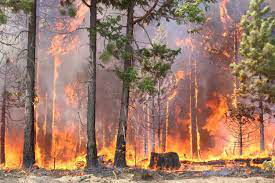

In [46]:
from PIL import Image
img= Image.open(streaming_body_12)
img.show()

In [47]:
new_image=img.resize((64,64))

In [48]:


import numpy as np
x= image.img_to_array(new_image)
x= np.expand_dims(x, axis=0)



In [49]:


pred= model.predict(x)



In [50]:
f=int(pred[0])
print(f)

1


In [51]:
index=['Forest without fire','Forest with fire' ]

In [52]:
a=index[f]
print(a)

Forest with fire
